<h1>Tensor networks for solving the time-independent Boltzmann
neutron transport equation</h1>

Duc P. Truong, Mario I. Ortega, Ismael Boureima, Gianmarco Manzini, Kim Ø. Rasmussen, Boian S. Alexandrov

https://www.sciencedirect.com/science/article/pii/S002199912400192X

In [1]:
addpath(genpath('../../matlab/NTE/src/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../matlab/utils/ttfunc/'))

close all; clear; clc;

In [2]:
%%
Nl = [2,4,8,16,32];
R = cell(1,numel(Nl));
for ix = 1:numel(Nl)
  L = Nl(ix);
  fprintf('********** L = %d ************** \n', L);
  % Slab Dimensions
  x0 = 0.0; x1 =2*1.853722;

  ibl = 0;
  ibr = 0;

  % Cross Section Data
  sigt = 0.32640;
  sigs = 0.225216;
  nusigf = 3.24*0.081600;
  chi = 1.0;
  vel = 1.0;
  G = length( sigt );
  % Problem Parameters
  M = 1023;
  ords = L;

  % Quadrature Information
  [ mu, wgt ] = AngularQuad1DSlab ( L, -1, 1 );

  %Source
  Q  = ones( G*(M+1)*ords, 1 );
  %Include Fission Source
  nosigf = 0;
  nosigs = 0;


  %% setup parameters
  param.a = 0.0;
  param.b = 2*1.853722;
  % scatterting parameters
  param.sigma_s = 0.225216;
  % fission parameters
  param.nusigma_f = 3.24*0.081600;
  param.chi = 1.0;

  param.sigma =[0.32640];

  param.nmu = L; % index l
  param.nx = M+1; % index i - number of EDGES

  tol = 1e-6; %both convergence and tt
  param.fixed_point_tol = 1e-6;
  param.niter = 200;
  
  %% TT fixed-point
  ts = datetime;
  [ttPsi1, ttk, ttconvrate] = qtt_1DSlab_EVP_1group_fn(param, tol);
  tt_time = seconds(datetime-ts);
  %%
  fprintf('L = %d \n',L);
  fprintf('ttk = %.5fs \n', ttk)
  fprintf('tt time = %.5fs \n', tt_time)
  fprintf('Psi1 compress ratio = %.5e \n ', compress_ratio_tt(ttPsi1));

  %% For plotting
  N_ttk(ix)     = ttk;
  N_tt_time(ix) = tt_time;
  N_compress_ratio(ix) = compress_ratio_tt(ttPsi1);
end

********** L = 2 ************** 
The fixed point scheme converged at iter = 14 
L = 2 
ttk = 0.80418s 
tt time = 15.57698s 
Psi1 compress ratio = 3.90625e-02 
 ********** L = 4 ************** 
The fixed point scheme converged at iter = 18 
L = 4 
ttk = 0.94714s 
tt time = 39.94253s 
Psi1 compress ratio = 7.87598e-01 
 ********** L = 8 ************** 
The fixed point scheme converged at iter = 20 
L = 8 
ttk = 0.99176s 
tt time = 53.54278s 
Psi1 compress ratio = 6.96045e-01 
 ********** L = 16 ************** 
The fixed point scheme converged at iter = 21 
L = 16 
ttk = 0.99847s 
tt time = 70.84160s 
Psi1 compress ratio = 4.69116e-01 
 ********** L = 32 ************** 
The fixed point scheme converged at iter = 22 
L = 32 
ttk = 0.99964s 
tt time = 93.00679s 
Psi1 compress ratio = 3.61389e-01 
 

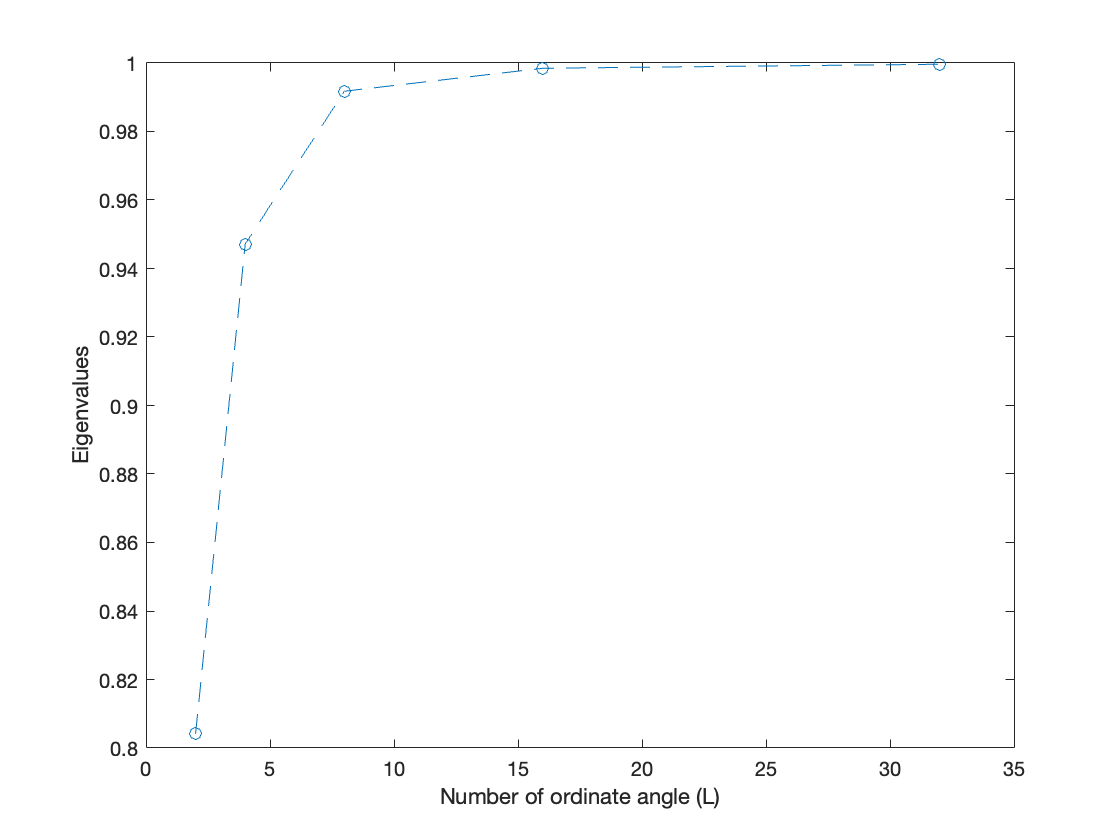

In [19]:
plot(Nl,N_ttk,'--o');
xlabel('Number of ordinate angle (L)');
ylabel('Eigenvalues');
clc;

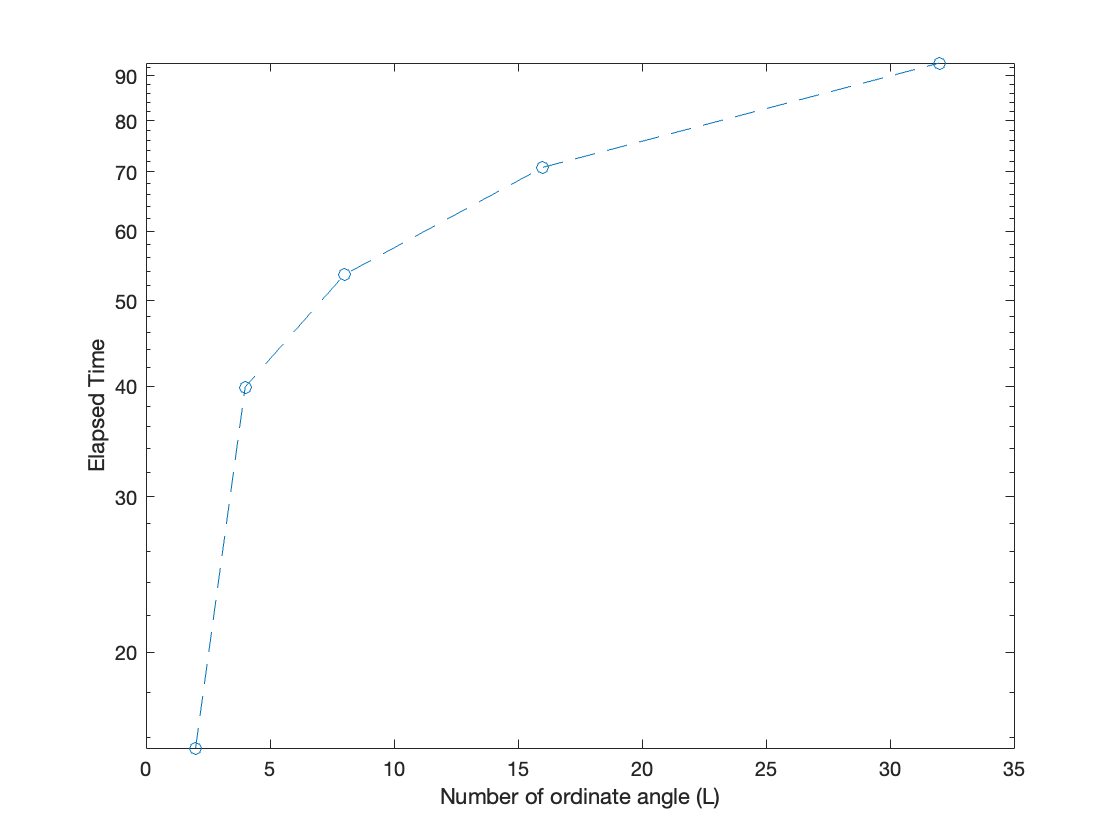

In [20]:
plot(Nl,N_tt_time,'--o');
xlabel('Number of ordinate angle (L)');
ylabel('Elapsed Time');
yscale('log');
clc;